## Association subtypes language task

In [1]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import scipy.io as sio
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
# load good stuff
%matplotlib inline
%load_ext rpy2.ipython
%load_ext oct2py.ipython
sns.set(color_codes=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Add niak hcp and psomm to oactve path
%octave addpath(genpath('~/git/Misc'));
%octave build_path hcp niak psom

Adding library hcp to the search path.

Adding library niak to the search path.

Adding library psom to the search path.

In [5]:
#  Set path
path_root = '/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_18-Jun-2017/';
path_association =  os.path.join(path_root,'associations/');
path_networks =  os.path.join(path_root,'networks/');

In [6]:
# List phenotypes
list_pheno  = [f for f in os.listdir(path_association)]
list_pheno = sorted(list_pheno)
list_pheno

['cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9']

In [7]:
# List trials
list_trial  = [f for f in os.listdir(path_networks)]
list_trial 

['story']

In [8]:
list_subtype = ['sub1','sub2','sub3','sub4','sub5']

In [9]:
# Create R-squared table to be used in R
for trial_name in list_trial :
    # build R2 table for radar plot
    for ix, pheno_name in enumerate(list_pheno):
        mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
        %octave_push mat_file
        %octave mat_load = load(mat_file);
        %octave_pull mat_load
        pheno_r2 = mat_load['glm_results'][trial_name]['rsquare']
        if ix == 0:
            pheno_r2_final = pd.Series(pheno_r2.tolist()[0])
        else:
            pheno_r2_final =pd.concat([pheno_r2_final,pd.Series(pheno_r2.tolist()[0])],axis=1)
            
    pheno_r2_final.columns = list_pheno
    pheno_r2_final.index = list_subtype
    pheno_r2_final = pd.DataFrame(pheno_r2_final)
    pheno_r2_final.to_csv(os.path.join(path_root,'{}_r2.csv'.format(trial_name)))

In [10]:
pheno_r2_final

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
sub1,0.031365,0.038060,0.029533,0.046171,0.036431,0.030244,0.030823,0.029535,0.051124
sub2,0.040732,0.029860,0.025771,0.085480,0.039803,0.025138,0.026600,0.027787,0.044652
sub3,0.031662,0.038123,0.031036,0.047346,0.037537,0.031003,0.031731,0.031316,0.053237
sub4,0.024919,0.033241,0.029702,0.029539,0.030472,0.029882,0.028140,0.028319,0.046491
sub5,0.031779,0.040206,0.032998,0.045240,0.038847,0.033831,0.033092,0.032289,0.054352


### On first run in new machine do
Step 1 — Installing System Dependencies for devtools

`sudo apt-get install build-essential libcurl4-gnutls-dev libxml2-dev libssl-dev libcairo2-dev r-cran-stringr`

Step 2 — Installing the Devtools Package

```sudo -i R
install.packages('devtools')
devtools::install_github("hadley/svglite")
devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)```

In [31]:
%%R
library(ggradar)
library(svglite)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

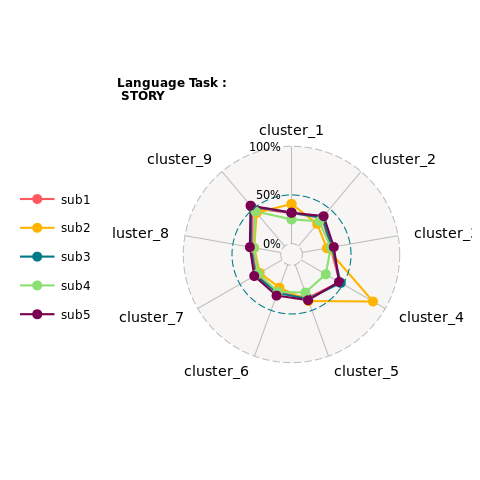

In [32]:
%%R -i path_root,list_trial
for (ii in list_trial) {
    MyData <- read.csv(file=paste(path_root,ii,"_r2.csv",sep = ''))
    # plot R2 radar plot
    image_radar=ggradar(MyData, 
                        grid.min = 0,
                        grid.mid = 0.05, 
                        grid.max = 0.1, 
                        axis.label.size = 5, 
                        grid.label.size = 5 ,
                        legend.text.size =5,
                        group.line.width = 1,
                        group.point.size = 4)  +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' Language Task : \n  ',toupper(ii),sep = ''))
    print(image_radar)
    ggsave(file=paste(path_root,ii,"_R-squared.svg",sep = ''), plot=image_radar, width=10, height=8)
}

In [33]:
# plot association wieght and phenotypes
for trial_name in list_trial :
    # build R2 table for radar plot
    for ix, pheno_name in enumerate(list_pheno):
        mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
        %octave_push mat_file
        %octave mat_load = load(mat_file);
        %octave_pull mat_load
        model_y =mat_load['model_raw']['y']
        model_x = mat_load['model_raw']['x']
        model_labels_x = mat_load['model_raw']['labels_x']
        model_labels_y = mat_load['model_raw']['labels_y']
        concat = [np.concatenate([model_y[x], model_x[x]]) for x in range(np.shape(model_y)[0])]
        model_df = pd.DataFrame(concat)
        model_df.index = model_labels_x
        colnames = np.concatenate([list_subtype,model_labels_y])
        model_df.columns = colnames
        model_df.to_csv(os.path.join(path_root,'{}_pheno_subtype.csv'.format(trial_name)))
        
        # plot association maps
        #for subtype in list_subtype:
        #    fig = plt.figure(figsize=(9,16))
        #    ax1 = fig.add_subplot(511)
        #    ax1 = sns.regplot(x=pheno_name, y=subtype, data=model_df,color="#BCB6FF");
        #    ax1.set_ylabel('{}_{}'.format(trial_name,subtype))
        #    ax1.set_xlabel(pheno_name)

In [15]:
model_df

,sub1,sub2,sub3,sub4,sub5,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,...,Mother_ID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
HCP100206,-0.044002,0.133014,0.038918,-0.088635,0.034384,0.088456,0.088456,0.099963,0.099963,0.094210,...,56037.0,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
HCP100307,0.577479,0.126689,-0.546649,0.399775,-0.528503,0.101970,0.101970,0.119331,0.119331,0.110650,...,51488.0,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
HCP100408,-0.206460,-0.082492,0.251270,-0.258280,0.240340,0.128052,0.128052,0.140232,0.140232,0.134142,...,51730.0,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
HCP100610,0.272108,0.075579,-0.308281,0.324437,-0.321563,0.189474,0.189474,0.179002,0.179002,0.184238,...,52813.0,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
HCP101006,-0.068098,-0.102695,0.045742,0.002438,0.086594,0.156877,0.156877,0.131924,0.131924,0.144401,...,51283.0,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365
HCP101107,-0.579395,-0.447603,0.646160,-0.361884,0.484283,0.224189,0.131822,0.325583,0.119171,0.125496,...,51969.0,-0.236587,-0.055247,0.202737,0.108271,-0.816365,0.164527,1.259271,0.350204,0.123138
HCP101309,-0.365247,-0.317822,0.320177,-0.055755,0.284151,0.074865,0.074865,0.089064,0.089064,0.081964,...,52385.0,2.460648,-0.639590,-1.056096,-0.458966,-0.579394,-0.306816,-0.491635,0.396082,-0.336725
HCP101410,-0.456847,-0.161918,0.520390,-0.473627,0.473163,0.126619,0.126619,0.133569,0.133569,0.130094,...,52198.0,-0.737608,-0.286803,-0.213357,0.012024,-0.830777,-0.408648,0.020646,0.388261,0.779067
HCP101915,0.041047,0.243031,-0.072019,-0.038360,-0.028678,0.093385,0.093385,0.097605,0.097605,0.095495,...,51977.0,1.461551,-1.096840,-0.838275,1.016038,0.083408,-0.056452,0.159738,1.173397,-0.532920
HCP102008,-0.061059,0.213092,-0.005173,-0.033090,0.035772,0.162509,0.162362,0.171901,0.169665,0.166013,...,52018.0,-0.891228,0.787911,-0.101854,0.511281,0.198667,0.152497,-0.006320,0.653874,0.721998


In [34]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd # read csv and manip tables 
import scipy.io #read .mat files

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,SVR
from sklearn import preprocessing

In [35]:
y_ = model_df['sub1'].values
x_ = model_df[['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5',
               'cluster_6','cluster_7','cluster_8','cluster_9']].values
print('y shape:',y_.shape)
print('x shape:',x_.shape)

y shape: (782,)
x shape: (782, 9)


In [24]:
scl_y = preprocessing.MinMaxScaler()
y = scl_y.fit_transform(y_.reshape(-1, 1))[:,0]
scl = preprocessing.StandardScaler()
x = scl.fit_transform(x_)

In [25]:
# init CV
scores = []
skf = KFold(n_splits=10)
for train_index, test_index in skf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train model
    #clf = SVR(kernel='linear', C=1e3)
    clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
    #clf = SVR(kernel='linear', C=1e1)
    #clf = SVR(kernel='poly')
    
    # grid search cv
    #clf = GridSearchCV(clf, cv=10,param_grid={"C": np.logspace(-2, 2, 10),"gamma": np.logspace(-2, 2, 10)})
    clf = GridSearchCV(clf, cv=5,param_grid={"C": np.logspace(-2, 3, 10)},n_jobs=6)
    #clf = GridSearchCV(clf, cv=5,param_grid={"C": np.logspace(-2, 3, 5),'degree':[3,4,5]},n_jobs=6)

    clf.fit(x_train, y_train)
    #sv_ratio = clf.best_estimator_.support_.shape[0] / (1.*len(y_train))
    #print("Support vector ratio: %.3f" % sv_ratio)
    
    # test
    scores.append(clf.score(x_test,y_test))
    print(clf.predict(x_test))
    print(scores[-1])
    
print('Average R2: ', np.mean(scores))


[ 0.55574603  0.51520009  0.51068899  0.4896324   0.47141246  0.48351403
  0.52565498  0.46374541  0.51257646  0.55224864  0.5352287   0.50611527
  0.47537296  0.51387029  0.49973276  0.4171661   0.52558716  0.54329308
  0.46685911  0.43982426  0.52656233  0.55422549  0.57023889  0.5340684
  0.54488328  0.5320646   0.5347132   0.57746362  0.51820411  0.45096205
  0.4827924   0.51616504  0.54016836  0.49282737  0.42650251  0.54922414
  0.51537975  0.48400639  0.56622832  0.5042202   0.49285887  0.55977149
  0.53379959  0.52784705  0.49473197  0.51528421  0.4840529   0.56339907
  0.52006847  0.49027197  0.51776508  0.46241638  0.46989602  0.49969786
  0.44000767  0.4937626   0.57616475  0.45053902  0.52199816  0.39240372
  0.53601773  0.53862243  0.44582383  0.48596678  0.55252841  0.50820417
  0.48909941  0.51545467  0.47669128  0.53795384  0.54789406  0.47264418
  0.50956608  0.57091774  0.50083481  0.58441243  0.50097732  0.45008917
  0.50171665]
-0.0477013440846
[ 0.52912318  0.52493

In [ ]:
plt.plot(y_test)
plt.plot(clf.predict(x_test))

In [46]:
clf.predict(x_test)*10 - y_test

array([-4.20461048, -0.86409215,  0.31454379, -0.13088274, -1.42059891,
       -2.39450276, -1.00686519, -6.60091974, -4.69029191,  1.65172799,
       -4.08944315,  0.53008308, -0.12215543, -1.68884067, -0.98956357,
       -5.45596688, -2.82111799,  1.09279896, -1.0602651 , -0.80968473,
       -1.62333711, -1.43934469, -1.00374195,  1.34991935, -0.74958633,
       -0.07845437,  0.11437811, -4.47527409, -1.7104315 , -3.07239018,
       -2.83565068,  0.87159813, -2.16006645, -0.1723757 , -2.25683847,
       -3.34709602, -1.27718976, -1.01956077,  2.8711886 ,  1.01373519,
       -0.88194978, -1.27112716, -3.67104424, -3.00779209, -2.77496486,
       -0.77860647, -2.11779141, -0.28677342, -0.46629841, -0.11372957,
       -0.10486228, -2.3273775 , -2.65104878, -1.30889582, -2.14268827,
       -0.19974579, -1.14484602, -2.15064829, -0.15532175,  0.83528507,
       -1.93576788, -1.25891602, -0.93426043, -4.20794242, -2.22106773,
       -2.48666897, -0.69980973, -1.87743979, -0.61088371, -2.80

In [50]:
clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
r = clf.fit(b, y_train)

In [53]:
print(r)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [47]:
b = np.concatenate((np.ones(x_train.shape + (1,)), x_train[..., None]),1)

In [54]:
b

array([[ 1.        , -0.30849142],
       [ 1.        , -0.02320696],
       [ 1.        ,  0.08609446],
       ..., 
       [ 1.        ,  0.0869828 ],
       [ 1.        , -0.06180076],
       [ 1.        ,  0.03654179]])

In [48]:
b.shape

(521, 2)

In [35]:
x_train.shape

(521,)

In [36]:
y_train.shape

(521,)

In [43]:
y_train

array([  7.19714152e-01,  -6.16568569e-01,   7.51768143e-01,
        -2.56341148e-01,  -2.08548321e-01,   1.65869777e+00,
        -1.07640005e+00,  -7.56461032e-01,   1.39542587e+00,
        -1.22367986e+00,   2.70661413e+00,   1.62839525e+00,
        -1.33460468e+00,  -6.48535360e-01,  -3.56882679e-01,
        -3.44448382e-01,  -7.45097222e-01,   1.42174704e+00,
        -2.22163437e-01,  -9.20499026e-01,  -1.24371487e-01,
         1.16767668e+00,   1.06133380e+00,  -1.02564102e+00,
        -1.18123405e+00,  -4.89680258e-01,   2.24736959e-01,
        -8.24886981e-01,   1.15202306e+00,  -5.01649091e-01,
        -1.55980532e+00,  -9.39876426e-03,  -1.13018284e+00,
        -7.59630933e-01,   1.67678220e+00,  -9.78152128e-01,
         1.64552427e+00,   4.88957728e-02,  -5.34707072e-01,
         1.05340894e+00,  -1.29770426e+00,  -1.43982040e+00,
        -1.38773599e+00,   7.50200078e-01,  -3.53643982e-01,
         1.19984200e+00,   2.91774550e+00,  -2.99774797e-01,
         7.62898879e-01,

In [42]:
x_train

array([-0.30849142, -0.02320696,  0.08609446,  0.18430688, -0.21208545,
       -0.58278535,  0.00305323, -0.77162255, -0.45663901,  0.05136636,
        0.22729541, -0.16015158, -0.68875003, -0.43226511,  0.05376947,
        0.22713237, -0.88893138, -0.37382915, -0.02761577, -0.4243101 ,
        0.26484978, -0.54914459, -0.12306755,  0.45521993,  0.15100539,
       -0.20144924, -0.17204038, -0.10768164, -0.15872905, -0.33746947,
       -0.47054225,  0.08342435,  0.23408141,  0.13521806,  0.17529201,
       -0.11546233,  0.12689403,  0.10487231,  0.24965284, -0.86906494,
       -0.59365779,  0.03719171,  0.39182195, -0.0533519 ,  0.3295965 ,
        0.12125083, -0.15920628,  0.08991829, -0.13515812,  0.02440385,
        0.21928849,  0.01790158,  0.06929018,  0.15320444, -0.08628468,
        0.20753865, -0.02964557,  0.04064956, -0.2006894 ,  0.33961272,
        0.08358905, -0.38963218, -0.1998677 , -0.02621379, -0.18704808,
       -0.22423859,  0.51361047, -0.46549336,  0.00626338, -0.83

In [37]:
type(y_train)

numpy.ndarray

In [38]:
type(x_train)

numpy.ndarray

In [40]:
np.sum(np.isnan(y_train))

0